# Classification problem: Stroke Prediction

Stroke is the sudden death of some brain cells due to lack of oxygen when the blood flow to the brain is lost by blockage or rupture of an artery to the brain. According to the World Health Organization (WHO) stroke is the 3rd leading cause of death and 2nd leading cause of disability worldwide. It is also a leading cause of dementia and depression. According to the WHO stroke is responsible for 11% of total deaths world wide.
Identifying if a person can get a stroke will help the health care professionals to come up and suggest effective prevention strategies including lifestyle changes. WHO studies have found that preventive strategies have proved effective in reducing stroke mortality. 

Purpose: Create a stroke prediction model to find out if a person is at risk to get a stroke based on the biological parameters like age, gender, existing diseases and smoking status.

Criteria of success: Identification of high risk person.

Use: Health care practitioners, patients/individuals.

## 1. Load Libraries
Pandas, Numpy and Sklearn are key libraries to develop the models.

In [357]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from statsmodels.stats import weightstats as stests

## 2. Load the dataset

In [358]:
df=pd.read_csv("stroke-data.csv")

In [359]:
df.shape

(5110, 12)

In [260]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## 3. Data Wrangling

In [360]:
# Drop id, since this is not a meaningful vi\ariable to analyze
df = df.drop(['id'],axis=1)

In [361]:
# The na values from bmi will be dropped, since it's around 4% of null values, which shouldn't affect
# the result
df = df.dropna(subset=['bmi'])

In [362]:
# this allows me to know which categories are for each variable
for i in ['gender','ever_married','work_type','Residence_type', 'smoking_status']:
    print("{}\n{}".format(i, df[i].value_counts()))

gender
Female    2897
Male      2011
Other        1
Name: gender, dtype: int64
ever_married
Yes    3204
No     1705
Name: ever_married, dtype: int64
work_type
Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64
Residence_type
Urban    2490
Rural    2419
Name: Residence_type, dtype: int64
smoking_status
never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64


# 4. Descriptive Statistics

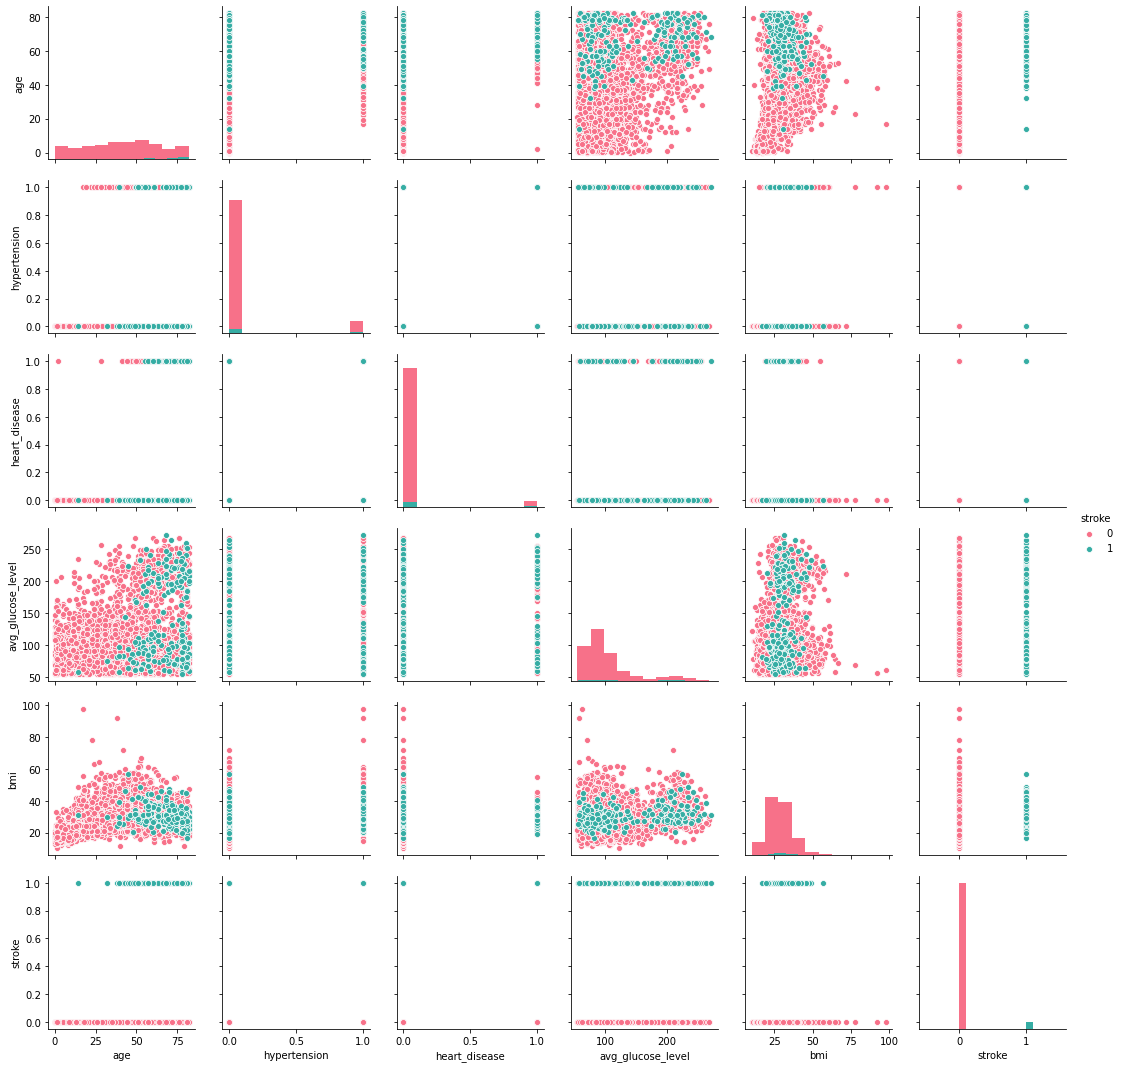

In [265]:
#To understand how the features relates to each other, I use pairplot (histogram and scatter plots).
sns.pairplot(df, diag_kind='hist', palette="husl",hue='stroke')
#It appears to be an unbalanced dataset, so it must be resampled to avoid bias.

In [363]:
#Lets to see some distributions, using bar charts. The features to be displayed are continuous variables
#like age, glucose level and bmi
#and 
#categorical like gender, ever_married, work_type, residence_status, smoking_status

In [365]:
#Continuous Variables over Purpose (Categorical)
df1=df.groupby('gender')['age'].mean().sort_values(ascending=False)
df2=df.groupby('gender')['avg_glucose_level'].mean().sort_values(ascending=False)
df3=df.groupby('gender')['bmi'].mean().sort_values(ascending=False)

/Users/mjcobosf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  """


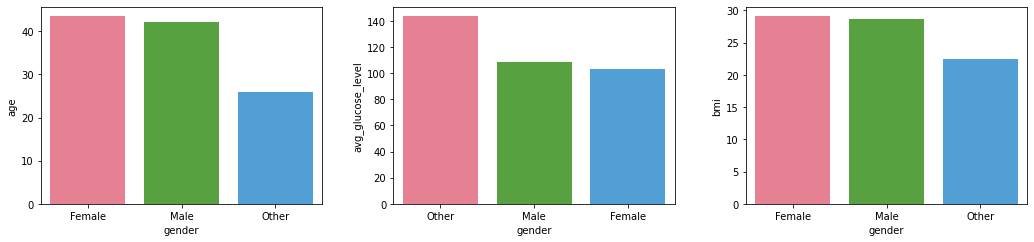

In [366]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.barplot(ax=axes[0],x=df1[:5,].index,y=df1[:5,], palette="husl")
sns.barplot(ax=axes[1],x=df2[:5,].index,y=df2[:5,], palette="husl")
sns.barplot(ax=axes[2],x=df3[:5,].index,y=df3[:5,], palette="husl")
plt.tight_layout(3.0)

In [367]:
#Continuous Variables over Purpose (Categorical)
df1=df.groupby('ever_married')['age'].mean().sort_values(ascending=False)
df2=df.groupby('ever_married')['avg_glucose_level'].mean().sort_values(ascending=False)
df3=df.groupby('ever_married')['bmi'].mean().sort_values(ascending=False)

/Users/mjcobosf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  """


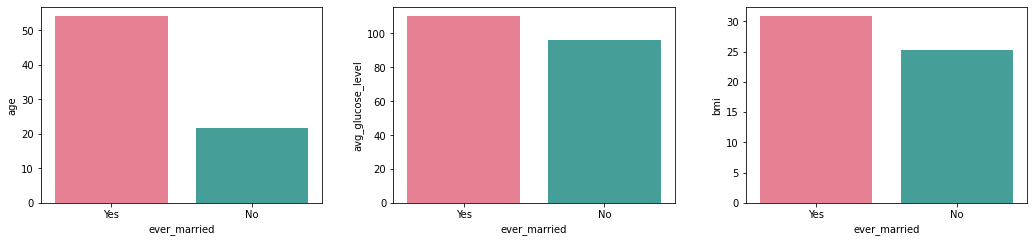

In [368]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.barplot(ax=axes[0],x=df1[:5,].index,y=df1[:5,], palette="husl")
sns.barplot(ax=axes[1],x=df2[:5,].index,y=df2[:5,], palette="husl")
sns.barplot(ax=axes[2],x=df3[:5,].index,y=df3[:5,], palette="husl")
plt.tight_layout(3.0)

In [369]:
#Continuous Variables over Purpose (Categorical)
df1=df.groupby('work_type')['age'].mean().sort_values(ascending=False)
df2=df.groupby('work_type')['avg_glucose_level'].mean().sort_values(ascending=False)
df3=df.groupby('work_type')['bmi'].mean().sort_values(ascending=False)

/Users/mjcobosf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  """


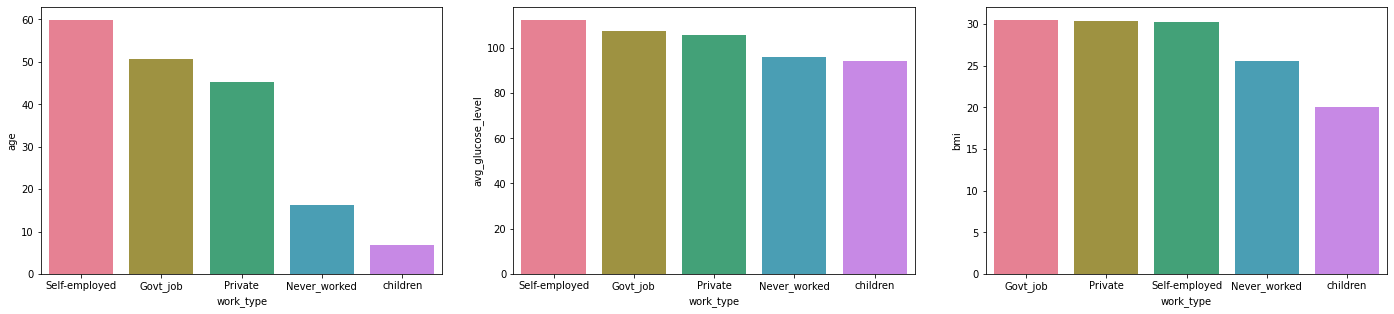

In [370]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
sns.barplot(ax=axes[0],x=df1[:5,].index,y=df1[:5,], palette="husl")
sns.barplot(ax=axes[1],x=df2[:5,].index,y=df2[:5,], palette="husl")
sns.barplot(ax=axes[2],x=df3[:5,].index,y=df3[:5,], palette="husl")
plt.tight_layout(3.0)

In [371]:
#Continuous Variables over Purpose (Categorical)
df1=df.groupby('Residence_type')['age'].mean().sort_values(ascending=False)
df2=df.groupby('Residence_type')['avg_glucose_level'].mean().sort_values(ascending=False)
df3=df.groupby('Residence_type')['bmi'].mean().sort_values(ascending=False)

/Users/mjcobosf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  """


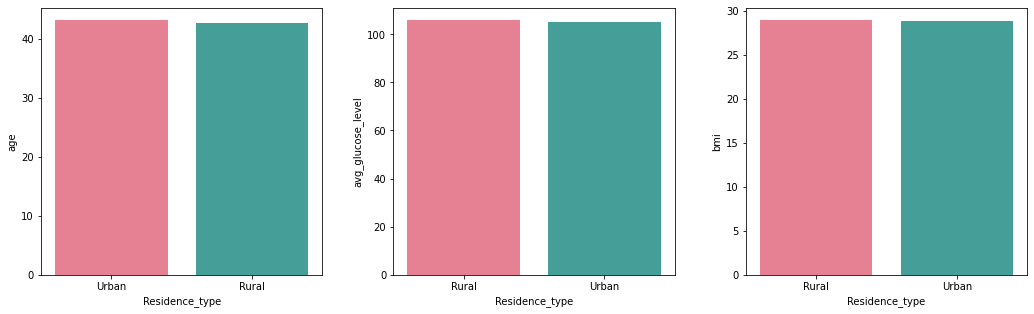

In [372]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(ax=axes[0],x=df1[:5,].index,y=df1[:5,], palette="husl")
sns.barplot(ax=axes[1],x=df2[:5,].index,y=df2[:5,], palette="husl")
sns.barplot(ax=axes[2],x=df3[:5,].index,y=df3[:5,], palette="husl")
plt.tight_layout(3.0)

In [373]:
#Continuous Variables over Purpose (Categorical)
df1=df.groupby('smoking_status')['age'].mean().sort_values(ascending=False)
df2=df.groupby('smoking_status')['avg_glucose_level'].mean().sort_values(ascending=False)
df3=df.groupby('smoking_status')['bmi'].mean().sort_values(ascending=False)

/Users/mjcobosf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Passing the pad parameter of tight_layout() positionally is deprecated since Matplotlib 3.3; the parameter will become keyword-only two minor releases later.
  """


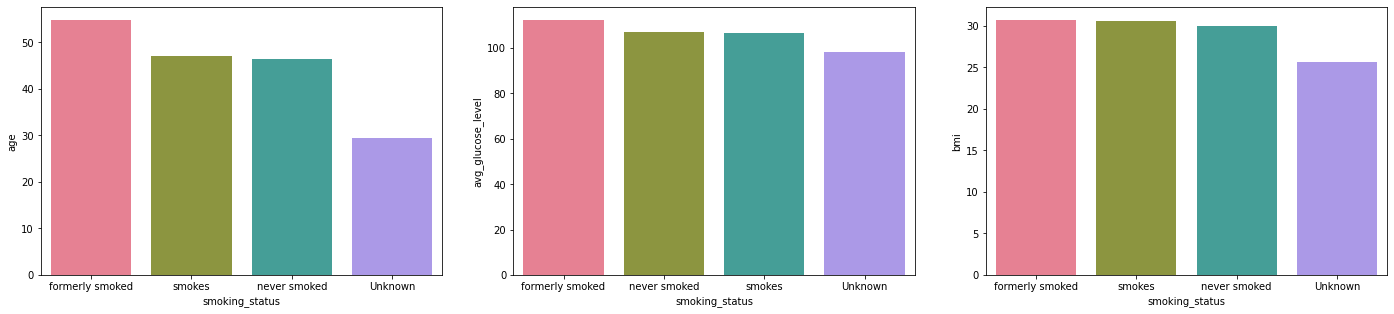

In [374]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
sns.barplot(ax=axes[0],x=df1[:5,].index,y=df1[:5,], palette="husl")
sns.barplot(ax=axes[1],x=df2[:5,].index,y=df2[:5,], palette="husl")
sns.barplot(ax=axes[2],x=df3[:5,].index,y=df3[:5,], palette="husl")
plt.tight_layout(3.0)

In [ ]:
#Using catplots, I will check some outliers that can potentially cause some noise in my analysis.
#and understand how my binary variables may be corralated to continuous variables.

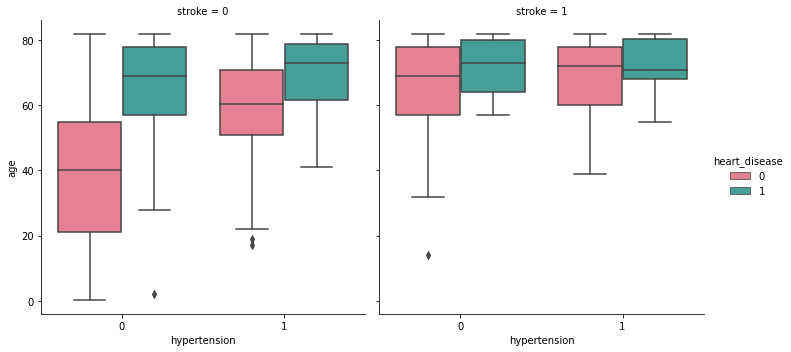

In [375]:
sns.catplot(y="age", x='hypertension', col='stroke', hue='heart_disease',
            kind="box",data=df,palette="husl")

In [ ]:
#The median age to suffer a stroke when you have a heart disease and hypertension is around 70.

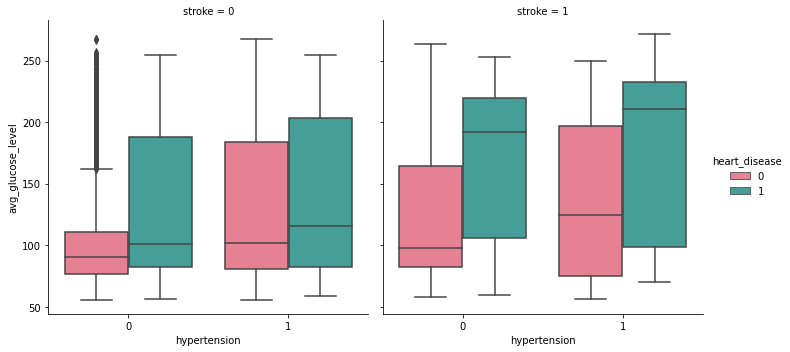

In [278]:
sns.catplot(y="avg_glucose_level", x='hypertension', col='stroke', hue='heart_disease',
            kind="box",data=df,palette="husl")

In [ ]:
#The median average glucose level in people who suffered a stroke and had some underlying preconditions as 
#hypertension and heart_disease is 210.

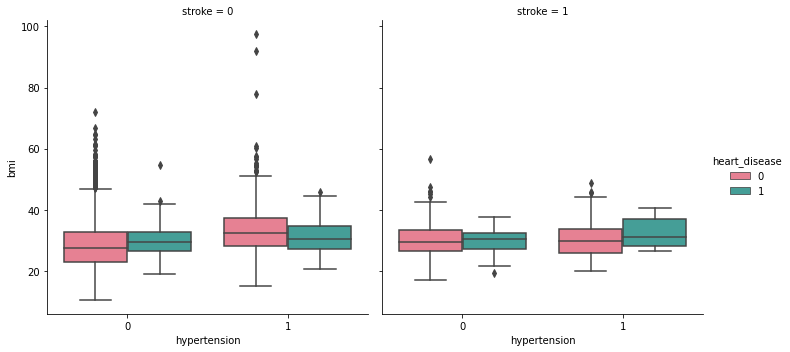

In [279]:
sns.catplot(y="bmi", x='hypertension', col='stroke', hue='heart_disease',
            kind="box",data=df,palette="husl")

In [ ]:
#The median bmi in people who suffered a stroke and had some underlying preconditions as 
#hypertension and heart_disease is 30.

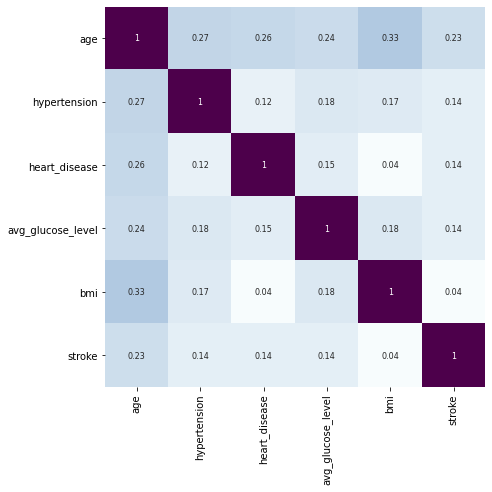

In [376]:
## In order to make sure my previous inferences were right, and to check the degree of correlation, 
## I use the Pearson Correlation Coeficient between numercial variables.
corr_df = df.iloc[:, :].corr().round(2) # rounding to 1 decimal point to make it easier to observe correlated features
plt.figure(figsize=(7, 7))
sns.heatmap(corr_df, cmap='BuPu',annot=True, square=True, annot_kws=dict(size=8), cbar=False)
plt.show()

#I could say there is a moderate degree of correakation between the variablea and stroke, my dependent v.

# 5. Hypothesis Testing

In [202]:
##Correlations is not causation. In order to look into factors that drive a stroke, I run A/B test, using
## Z-test since is a binary variable (test on proportions) and check the p-value. If this is less than 0.5
## It means there is a statistically significant difference between the population's means (A vs B) two
## different versions of the same variable

In [377]:
# Split the data for a z-test
#Let's check if gender may be a cause of stroke.
gender_m= df.loc[df['gender'] == 'Male']
gender_f= df.loc[df['gender'] == 'Female']

t2,p2=stests.ztest(gender_m['stroke'], gender_f['stroke'], value=0,alternative='two-sided')
if p2<=0.05:
     print('z-statistic ={:.3f}, p-value ={:.3f}\n'.format(t2,p2))
else:
    print('Fail to reject the null hypothesis. The two population means are equal.')

Fail to reject the null hypothesis. The two population means are equal.


The difference in means at the 95% confidence interval (two-tail) is between -0.013410780719454615 and 0.01907963653095873.


Text(0.5, 1.0, 'Proportion of Stroke')

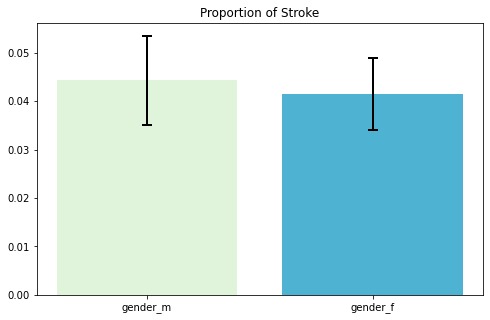

In [378]:
## The hypothesis testing failed to reject the null, so I can conclude there is no difference in the
## population proportion of gender.
## I built a chart to compare the two proportions.
    
    count_1 = gender_m.shape[0]
    count_2 = gender_f.shape[0]
    sample_1_sum = gender_m['stroke'].sum()
    sample_2_sum = gender_f['stroke'].sum()
 
    
    prop_1 = sample_1_sum/count_1
    prop_2 = sample_2_sum/count_2
    
    std_err_1_n = math.sqrt((prop_1*(1-prop_1))/count_1)
    std_err_2_n = math.sqrt((prop_2*(1-prop_2))/count_2)
    
   # margin_of_error_1_n = 1.96 * std_err_1_n 
   # margin_of_error_2_n = 1.96 * std_err_2_n 
    x1=['gender_m','gender_f']
    
    mean_difference = prop_1 - prop_2
    std_err_difference = std_err_1_n + std_err_2_n
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    
    print("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")
    
    plt.figure(figsize = (8,5))
    plt.bar(x=x1,height=[prop_1,prop_2],yerr=(2*std_err_1_n,2*std_err_2_n),error_kw=dict(ecolor='black', lw=2, capsize=5, capthick=2),
            color=['#e0f3db', '#4eb3d3'])
    plt.title('Proportion of Stroke')

In [287]:
# Split the data for a z-test
# Split the data for a z-test
#Let's check if hypertension may be a cause of stroke.

hypertension_1= df.loc[df['hypertension'] == 1]
hypertension_0= df.loc[df['hypertension'] == 0]

t2,p2=stests.ztest(hypertension_1['stroke'], hypertension_0['stroke'], value=0,alternative='two-sided')
if p2<=0.05:
     print('z-statistic ={:.3f}, p-value ={:.3f}\n'.format(t2,p2))
else:
    print('Fail to reject the null hypothesis. The two population means are equal.')

z-statistic =10.086, p-value =0.000



The difference in means at the 95% confidence interval (two-tail) is between 0.0629942992563356 and 0.1362349694342468.


Text(0.5, 1.0, 'Proportion of Stroke')

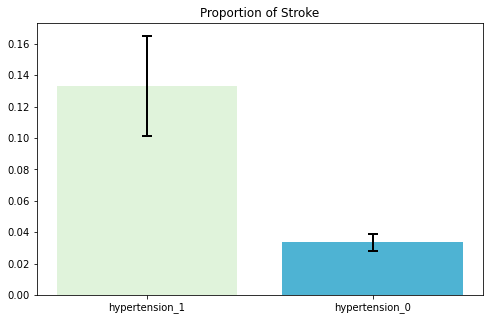

In [288]:
## The hypothesis testing rejected the null, so I can conclude there is statistically significant
## difference in the population proportion when the patient had or hadn't an underlying condition
## I built a chart to compare the two proportions.

    count_1 = hypertension_1.shape[0]
    count_2 = hypertension_0.shape[0]
    sample_1_sum = hypertension_1['stroke'].sum()
    sample_2_sum = hypertension_0['stroke'].sum()
 
    
    prop_1 = sample_1_sum/count_1
    prop_2 = sample_2_sum/count_2
    
    std_err_1_n = math.sqrt((prop_1*(1-prop_1))/count_1)
    std_err_2_n = math.sqrt((prop_2*(1-prop_2))/count_2)
    
   # margin_of_error_1_n = 1.96 * std_err_1_n 
   # margin_of_error_2_n = 1.96 * std_err_2_n 
    x1=['hypertension_1','hypertension_0']
    
    mean_difference = prop_1 - prop_2
    std_err_difference = std_err_1_n + std_err_2_n
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    
    print("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")
    
    plt.figure(figsize = (8,5))
    plt.bar(x=x1,height=[prop_1,prop_2],yerr=(2*std_err_1_n,2*std_err_2_n),error_kw=dict(ecolor='black', lw=2, capsize=5, capthick=2),
            color=['#e0f3db', '#4eb3d3'])
    plt.title('Proportion of Stroke')

In [289]:
# Split the data for a z-test
#Let's check if heart disease may be a cause of stroke.

# Split the data for a z-test
heart_disease_1= df.loc[df['heart_disease'] == 1]
heart_disease_0= df.loc[df['heart_disease'] == 0]

t2,p2=stests.ztest(heart_disease_1['stroke'], heart_disease_0['stroke'], value=0,alternative='two-sided')
if p2<=0.05:
     print('z-statistic ={:.3f}, p-value ={:.3f}\n'.format(t2,p2))
else:
    print('Fail to reject the null hypothesis. The two population means are equal.')

z-statistic =9.756, p-value =0.000



The difference in means at the 95% confidence interval (two-tail) is between 0.07640299279178525 and 0.1803761943584073.


Text(0.5, 1.0, 'Proportion of Stroke')

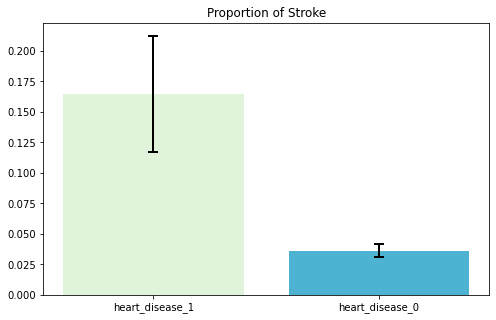

In [290]:
## The hypothesis testing rejected the null, so I can conclude there is statistically significant
## difference in the population proportion when the patient had or hadn't an underlying condition
## I built a chart to compare the two proportions.

    count_1 = heart_disease_1.shape[0]
    count_2 = heart_disease_0.shape[0]
    sample_1_sum = heart_disease_1['stroke'].sum()
    sample_2_sum = heart_disease_0['stroke'].sum()
 
    
    prop_1 = sample_1_sum/count_1
    prop_2 = sample_2_sum/count_2
    
    std_err_1_n = math.sqrt((prop_1*(1-prop_1))/count_1)
    std_err_2_n = math.sqrt((prop_2*(1-prop_2))/count_2)
    
   # margin_of_error_1_n = 1.96 * std_err_1_n 
   # margin_of_error_2_n = 1.96 * std_err_2_n 
    x1=['heart_disease_1','heart_disease_0']
    
    mean_difference = prop_1 - prop_2
    std_err_difference = std_err_1_n + std_err_2_n
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    
    print("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")
    
    plt.figure(figsize = (8,5))
    plt.bar(x=x1,height=[prop_1,prop_2],yerr=(2*std_err_1_n,2*std_err_2_n),error_kw=dict(ecolor='black', lw=2, capsize=5, capthick=2),
            color=['#e0f3db', '#4eb3d3'])
    plt.title('Proportion of Stroke')

In [291]:
# Split the data for a z-test

#Let's check if your marital status may be a cause of stroke.

ever_married_1= df.loc[df['ever_married'] == "Yes"]
ever_married_0= df.loc[df['ever_married'] == "No"]

t2,p2=stests.ztest(ever_married_1['stroke'], ever_married_0['stroke'], value=0,alternative='two-sided')
if p2<=0.05:
     print('z-statistic ={:.3f}, p-value ={:.3f}\n'.format(t2,p2))
else:
    print('Fail to reject the null hypothesis. The two population means are equal.')

z-statistic =7.402, p-value =0.000



The difference in means at the 95% confidence interval (two-tail) is between 0.030989740444454336 and 0.058135656328640886.


Text(0.5, 1.0, 'Proportion of Stroke')

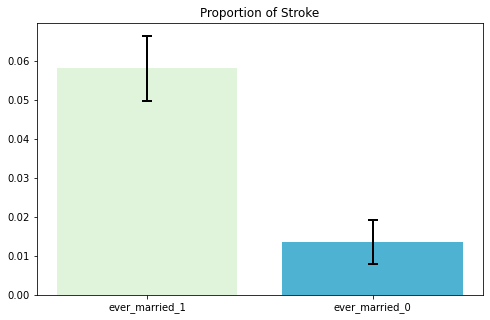

In [292]:
## The hypothesis testing rejected the null, so I can conclude there is statistically significant
## difference in the population proportion when the patient is married or not.
## I built a chart to compare the two proportions.
    
    count_1 = ever_married_1.shape[0]
    count_2 = ever_married_0.shape[0]
    sample_1_sum = ever_married_1['stroke'].sum()
    sample_2_sum = ever_married_0['stroke'].sum()
 
    
    prop_1 = sample_1_sum/count_1
    prop_2 = sample_2_sum/count_2
    
    std_err_1_n = math.sqrt((prop_1*(1-prop_1))/count_1)
    std_err_2_n = math.sqrt((prop_2*(1-prop_2))/count_2)
    
   # margin_of_error_1_n = 1.96 * std_err_1_n 
   # margin_of_error_2_n = 1.96 * std_err_2_n 
    x1=['ever_married_1','ever_married_0']
    
    mean_difference = prop_1 - prop_2
    std_err_difference = std_err_1_n + std_err_2_n
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    
    print("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")
    
    plt.figure(figsize = (8,5))
    plt.bar(x=x1,height=[prop_1,prop_2],yerr=(2*std_err_1_n,2*std_err_2_n),error_kw=dict(ecolor='black', lw=2, capsize=5, capthick=2),
            color=['#e0f3db', '#4eb3d3'])
    plt.title('Proportion of Stroke')

In [293]:
# Split the data for a z-test

#Let's check if your work type may be a cause of stroke.

private= df.loc[df['work_type'] == "Private"]
gov= df.loc[df['work_type'] == "Govt_job"]

t2,p2=stests.ztest(private['stroke'], gov['stroke'], value=0,alternative='two-sided')
if p2<=0.05:
     print('z-statistic ={:.3f}, p-value ={:.3f}\n'.format(t2,p2))
else:
    print('Fail to reject the null hypothesis. The two population means are equal.')

Fail to reject the null hypothesis. The two population means are equal.


The difference in means at the 95% confidence interval (two-tail) is between -0.023035429134957083 and 0.02450584298530689.


Text(0.5, 1.0, 'Proportion of Stroke')

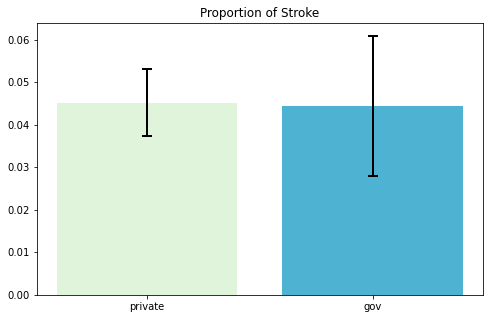

In [294]:
## The hypothesis testing failed to reject the null, so I can conclude there is no difference in the
## population proportion.
## I built a chart to compare the two proportions.
    
    count_1 = private.shape[0]
    count_2 = gov.shape[0]
    sample_1_sum = private['stroke'].sum()
    sample_2_sum = gov['stroke'].sum()
 
    
    prop_1 = sample_1_sum/count_1
    prop_2 = sample_2_sum/count_2
    
    std_err_1_n = math.sqrt((prop_1*(1-prop_1))/count_1)
    std_err_2_n = math.sqrt((prop_2*(1-prop_2))/count_2)
    
   # margin_of_error_1_n = 1.96 * std_err_1_n 
   # margin_of_error_2_n = 1.96 * std_err_2_n 
    x1=['private','gov']
    
    mean_difference = prop_1 - prop_2
    std_err_difference = std_err_1_n + std_err_2_n
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    
    print("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")
    
    plt.figure(figsize = (8,5))
    plt.bar(x=x1,height=[prop_1,prop_2],yerr=(2*std_err_1_n,2*std_err_2_n),error_kw=dict(ecolor='black', lw=2, capsize=5, capthick=2),
            color=['#e0f3db', '#4eb3d3'])
    plt.title('Proportion of Stroke')

In [295]:
# Split the data for a z-test
#Let's check if your residence_type may be a cause of stroke.

urban= df.loc[df['Residence_type'] == "Urban"]
rural= df.loc[df['Residence_type'] == "Rural"]

t2,p2=stests.ztest(urban['stroke'], rural['stroke'], value=0,alternative='two-sided')
if p2<=0.05:
     print('z-statistic ={:.3f}, p-value ={:.3f}\n'.format(t2,p2))
else:
    print('Fail to reject the null hypothesis. The two population means are equal.')

Fail to reject the null hypothesis. The two population means are equal.


The difference in means at the 95% confidence interval (two-tail) is between -0.013533759814086783 and 0.01840516772767583.


Text(0.5, 1.0, 'Proportion of Stroke')

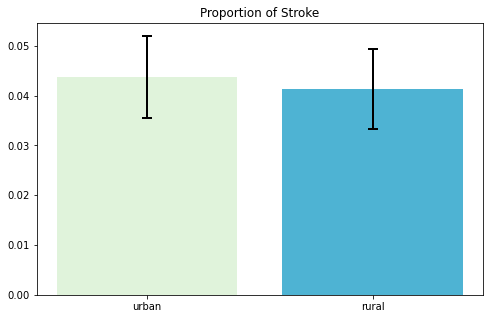

In [296]:
## The hypothesis testing failed to reject the null, so I can conclude there is no difference in the
## population proportion.
## I built a chart to compare the two proportions.
    
    count_1 = urban.shape[0]
    count_2 = rural.shape[0]
    sample_1_sum = urban['stroke'].sum()
    sample_2_sum = rural['stroke'].sum()
 
    
    prop_1 = sample_1_sum/count_1
    prop_2 = sample_2_sum/count_2
    
    std_err_1_n = math.sqrt((prop_1*(1-prop_1))/count_1)
    std_err_2_n = math.sqrt((prop_2*(1-prop_2))/count_2)
    
   # margin_of_error_1_n = 1.96 * std_err_1_n 
   # margin_of_error_2_n = 1.96 * std_err_2_n 
    x1=['urban','rural']
    
    mean_difference = prop_1 - prop_2
    std_err_difference = std_err_1_n + std_err_2_n
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    
    print("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")
    
    plt.figure(figsize = (8,5))
    plt.bar(x=x1,height=[prop_1,prop_2],yerr=(2*std_err_1_n,2*std_err_2_n),error_kw=dict(ecolor='black', lw=2, capsize=5, capthick=2),
            color=['#e0f3db', '#4eb3d3'])
    plt.title('Proportion of Stroke')

In [297]:
# Split the data for a z-test
#Let's check if your smoking status may be a cause of stroke.

smoke_1= df.loc[df['smoking_status'] == "smokes"]
smoke_0= df.loc[df['smoking_status'] == "never smoked"]

t2,p2=stests.ztest(smoke_1['stroke'], smoke_0['stroke'], value=0,alternative='two-sided')
if p2<=0.05:
     print('z-statistic ={:.3f}, p-value ={:.3f}\n'.format(t2,p2))
else:
    print('Fail to reject the null hypothesis. The two population means are equal.')

Fail to reject the null hypothesis. The two population means are equal.


The difference in means at the 95% confidence interval (two-tail) is between -0.018078972534536615 and 0.033200693597394325.


Text(0.5, 1.0, 'Proportion of Stroke')

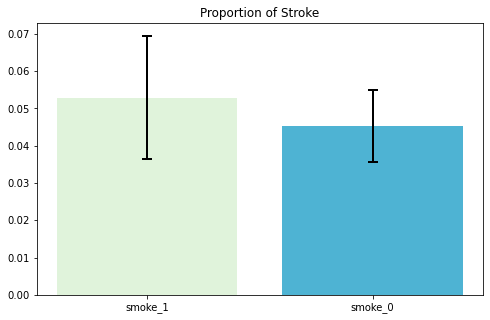

In [298]:
## The hypothesis testing failed to reject the null, so I can conclude there is no difference in the
## population proportion.
## I built a chart to compare the two proportions.

    count_1 = smoke_1.shape[0]
    count_2 = smoke_0.shape[0]
    sample_1_sum = smoke_1['stroke'].sum()
    sample_2_sum = smoke_0['stroke'].sum()
 
    
    prop_1 = sample_1_sum/count_1
    prop_2 = sample_2_sum/count_2
    
    std_err_1_n = math.sqrt((prop_1*(1-prop_1))/count_1)
    std_err_2_n = math.sqrt((prop_2*(1-prop_2))/count_2)
    
   # margin_of_error_1_n = 1.96 * std_err_1_n 
   # margin_of_error_2_n = 1.96 * std_err_2_n 
    x1=['smoke_1','smoke_0']
    
    mean_difference = prop_1 - prop_2
    std_err_difference = std_err_1_n + std_err_2_n
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    
    print("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")
    
    plt.figure(figsize = (8,5))
    plt.bar(x=x1,height=[prop_1,prop_2],yerr=(2*std_err_1_n,2*std_err_2_n),error_kw=dict(ecolor='black', lw=2, capsize=5, capthick=2),
            color=['#e0f3db', '#4eb3d3'])
    plt.title('Proportion of Stroke')

# 5. Modeling

### Categorical Feature Transformation

In [300]:
df['stroke'].value_counts()

0    4700
1     209
Name: stroke, dtype: int64

In [301]:
dummies = pd.get_dummies(df[['gender','ever_married','work_type', 'Residence_type','smoking_status']], drop_first=True)
df = df.drop(['gender','ever_married','work_type', 'Residence_type','smoking_status'],axis=1)
df = pd.concat([df,dummies],axis=1)

### Train and Test split for unbalanced dataset

In [302]:
X = df.drop(['stroke'], axis=1)
y = df['stroke']
print(X.shape)
print(y.shape)

(4909, 16)
(4909,)


In [303]:
X_train, X_test,y_train,y_test=train_test_split(X,y,stratify=y, random_state=1)

### Train and Test split for balanced dataset

In [307]:
#fractions = {"False": 1.0, "True": 0.2523}
stroke_DF = df[df['stroke']==0].sample(frac=0.0444, replace=True, random_state=1)
stroke_DF1= df[df['stroke']==1]
df_balanced=pd.concat([stroke_DF,stroke_DF1],ignore_index=True)

In [308]:
df_balanced['stroke'].value_counts()

0    209
1    209
Name: stroke, dtype: int64

In [309]:
# Separate features and target
X = df_balanced.drop(['stroke'], axis = 1)
y = df_balanced['stroke']

print(X.shape)
print(y.shape)

(418, 16)
(418,)


In [310]:
X_train_bal, X_test_bal,y_train_bal,y_test_bal=train_test_split(X,y,stratify=y, random_state=2)

Before starting looking for the best model and hyperparameters, it is important to make it clear that for this stroke prediction problem, one of the most important metrics to evaluate models performance is recall. Since I am looking for the best model that predicts stroke probability, my false negatives need to be low, so recall is the right metric to look into.

## Logistic Regression

In [381]:
##Every distributions is close to normal so let's use StandardScaler to standarize the data. 
grid_lr=GridSearchCV(LogisticRegression(solver='lbfgs', penalty='l2', random_state=2),
                                   param_grid={'C':np.logspace(-3,3,7)},
                                   cv=10, 
                                   refit=True)

pipe_lr=make_pipeline(StandardScaler(),
                      grid_lr)

In [382]:
#Normalizing / scaling the data
#We scale the feature data. To prevent data leakage from the test set, we only fit our scaler 
#to the training set.

pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=10,
                              estimator=LogisticRegression(random_state=2),
                              param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}))])

In [383]:
print('Score on training data: ', pipe_lr.score(X_train, y_train))
print('Score on test data: ', pipe_lr.score(X_test, y_test))
print("Tuned hyperparameters :(best parameters) ",grid_lr.best_params_)
print("Best_score :",grid_lr.best_score_)

Score on training data:  0.9573485465906004
Score on test data:  0.9576547231270358
Tuned hyperparameters :(best parameters)  {'C': 0.001}
Best_score : 0.957348739248262


In [384]:
predictions=pipe_lr.predict(X_test)
confusion=confusion_matrix(y_test,predictions,labels=[1,0])
print(confusion)

[[   0   52]
 [   0 1176]]


In [385]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))

Accuracy score: 0.96
Precision score: 0.00
Recall score: 0.00
F1 score: 0.00


/Users/mjcobosf/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Definetively, I can use a unbalanced dataset, since my recall scores are 0. From now on, the balanced version of my dataset will be utilized.

In [386]:
pipe_lr.fit(X_train_bal, y_train_bal)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=10,
                              estimator=LogisticRegression(random_state=2),
                              param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}))])

In [387]:
print('Score on training data: ', pipe_lr.score(X_train_bal, y_train_bal))
print('Score on test data: ', pipe_lr.score(X_test_bal, y_test_bal))
print("Tuned hyperparameters :(best parameters) ",grid_lr.best_params_)
print("Best_score :",grid_lr.best_score_)

Score on training data:  0.8019169329073482
Score on test data:  0.7523809523809524
Tuned hyperparameters :(best parameters)  {'C': 0.1}
Best_score : 0.7793346774193549


In [388]:
predictions=pipe_lr.predict(X_test_bal)
confusion=confusion_matrix(y_test_bal,predictions,labels=[1,0])
print(confusion)

[[44  8]
 [18 35]]


In [389]:
accuracy = accuracy_score(y_test_bal, predictions)
precision = precision_score(y_test_bal, predictions)
recall = recall_score(y_test_bal, predictions)
f1 = f1_score(y_test_bal, predictions)

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))

Accuracy score: 0.75
Precision score: 0.71
Recall score: 0.85
F1 score: 0.77


## K Nearest Neighbor

In [390]:
grid_knn=GridSearchCV(KNeighborsClassifier(),param_grid={'n_neighbors': np.arange(1,30,2)},cv=5, refit=True)
pipe_knn=make_pipeline(StandardScaler(),
                       grid_knn)

In [391]:
pipe_knn.fit(X_train_bal, y_train_bal)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gridsearchcv',
                 GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
                              param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29])}))])

In [392]:
print('Score on training data: ', pipe_knn.score(X_train_bal, y_train_bal))
print('Score on test data: ', pipe_knn.score(X_test_bal, y_test_bal))
print("Tuned hyperparameters :(best parameters) ",grid_knn.best_params_)
print("Best_score :",grid_knn.best_score_)

Score on training data:  0.7476038338658147
Score on test data:  0.6857142857142857
Tuned hyperparameters :(best parameters)  {'n_neighbors': 23}
Best_score : 0.7192012288786482


In [393]:
predictions=pipe_knn.predict(X_test_bal)
confusion=confusion_matrix(y_test_bal,predictions,labels=[1,0])
print(confusion)

[[35 17]
 [16 37]]


In [394]:
accuracy = accuracy_score(y_test_bal, predictions)
precision = precision_score(y_test_bal, predictions)
recall = recall_score(y_test_bal, predictions)
f1 = f1_score(y_test_bal, predictions)

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))

Accuracy score: 0.69
Precision score: 0.69
Recall score: 0.67
F1 score: 0.68


# SVC

In [395]:
grid_svc=GridSearchCV(SVC(random_state=2),param_grid={'C':np.logspace(-3,2,6), 'gamma':np.logspace(-3,2,6)/X_train.shape[0]},cv=10)
pipe_svc=make_pipeline(StandardScaler(), PCA(n_components=10),
                       grid_svc)

In [396]:
pipe_svc.fit(X_train_bal, y_train_bal)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=10)),
                ('gridsearchcv',
                 GridSearchCV(cv=10, estimator=SVC(random_state=2),
                              param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                                          'gamma': array([2.71665308e-07, 2.71665308e-06, 2.71665308e-05, 2.71665308e-04,
       2.71665308e-03, 2.71665308e-02])}))])

In [397]:
print('Score on training data: ', pipe_svc.score(X_train_bal, y_train_bal))
print('Score on test data: ', pipe_svc.score(X_test_bal, y_test_bal))
print("Tuned hyperparameters :(best parameters) ",grid_svc.best_params_)
print("Best_score :",grid_svc.best_score_)

Score on training data:  0.7571884984025559
Score on test data:  0.7047619047619048
Tuned hyperparameters :(best parameters)  {'C': 0.1, 'gamma': 0.027166530834012496}
Best_score : 0.7444556451612904


In [398]:
predictions=pipe_svc.predict(X_test_bal)
confusion=confusion_matrix(y_test_bal,predictions,labels=[1,0])
print(confusion)

[[44  8]
 [23 30]]


In [399]:
accuracy = accuracy_score(y_test_bal, predictions)
precision = precision_score(y_test_bal, predictions)
recall = recall_score(y_test_bal, predictions)
f1 = f1_score(y_test_bal, predictions)

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))

Accuracy score: 0.70
Precision score: 0.66
Recall score: 0.85
F1 score: 0.74


# Random Forest

In [400]:
model_params = {
    'n_estimators': [50, 150, 250],
    'max_features': ['sqrt', 0.25, 0.5, 0.75, 1.0],
    'min_samples_split': [2, 4, 6]
}

# create random forest classifier model
rf_model = RandomForestClassifier(random_state=2)

# set up grid search meta-estimator
grid_rf = GridSearchCV(rf_model, model_params, cv=5)

pipe_rf = make_pipeline(
                        grid_rf)

In [401]:
pipe_rf.fit(X_train_bal, y_train_bal)

Pipeline(steps=[('gridsearchcv',
                 GridSearchCV(cv=5,
                              estimator=RandomForestClassifier(random_state=2),
                              param_grid={'max_features': ['sqrt', 0.25, 0.5,
                                                           0.75, 1.0],
                                          'min_samples_split': [2, 4, 6],
                                          'n_estimators': [50, 150, 250]}))])

In [332]:
print('Score on training data: ', pipe_rf.score(X_train_bal, y_train_bal))
print('Score on test data: ', pipe_rf.score(X_test_bal, y_test_bal))
print("Tuned hyperparameters :(best parameters) ",grid_rf.best_params_)
print("Best_score :",grid_rf.best_score_)

Score on training data:  0.9744408945686901
Score on test data:  0.7619047619047619
Tuned hyperparameters :(best parameters)  {'max_features': 0.5, 'min_samples_split': 6, 'n_estimators': 150}
Best_score : 0.7573988735279059


In [333]:
predictions=pipe_rf.predict(X_test_bal)
confusion=confusion_matrix(y_test_bal,predictions,labels=[1,0])
print(confusion)

[[43  9]
 [16 37]]


In [334]:
accuracy = accuracy_score(y_test_bal, predictions)
precision = precision_score(y_test_bal, predictions)
recall = recall_score(y_test_bal, predictions)
f1 = f1_score(y_test_bal, predictions)

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))

Accuracy score: 0.76
Precision score: 0.73
Recall score: 0.83
F1 score: 0.77


# CatBoostClassifier

In [ ]:
#CatBoost is based on gradient boosting. 
n = y_train.value_counts()
model = CatBoostClassifier(learning_rate=0.03,
                           iterations=1000,
                           early_stopping_rounds=100,
                           class_weights=[1, n[0] / n[1]],
                           verbose=False,
                           random_state=0)

In [347]:
model.fit(X_train_bal, y_train_bal)

In [349]:
predictions=model.predict(X_test_bal)
confusion=confusion_matrix(y_test_bal,predictions,labels=[1,0])
print(confusion)

[[51  1]
 [30 23]]


In [350]:
print('Score on training data: ', model.score(X_train_bal, y_train_bal))
print('Score on test data: ', model.score(X_test_bal, y_test_bal))

Score on training data:  0.7731629392971247
Score on test data:  0.7047619047619048


In [351]:
accuracy = accuracy_score(y_test_bal, predictions)
precision = precision_score(y_test_bal, predictions)
recall = recall_score(y_test_bal, predictions)
f1 = f1_score(y_test_bal, predictions)

print('Accuracy score: {:.2f}'.format(accuracy))
print('Precision score: {:.2f}'.format(precision))
print('Recall score: {:.2f}'.format(recall))
print('F1 score: {:.2f}'.format(f1))

Accuracy score: 0.70
Precision score: 0.63
Recall score: 0.98
F1 score: 0.77


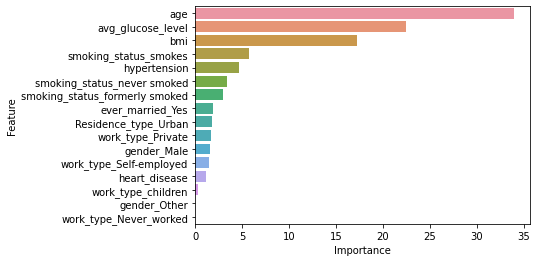

In [356]:
feat = model.feature_names_
imp = model.feature_importances_
df1 = pd.DataFrame({'Feature': feat, 'Importance': imp})
df1 = df.sort_values('Importance', ascending=False)[:18]
sns.barplot(x='Importance', y='Feature', data=df1);

In [403]:
## Age, glucose level and BMI are the most important features to predict the stroke incidence, 
## according to Catboost algorithm.

### Conclusions

#### Highest Accuracy score: 0.76

Balanced Dataset

Algorithm: Random Forest

Parameters: (best parameters)  {'max_features': 0.5, 'min_samples_split': 6, 'n_estimators': 150}


Even though this model shows the highest accuracy, the problem address a stroke probability, so accuracy is not the metric I need to look into.



#### Highest Recall score: 0.98

Balanced Dataset

Algorithm: CatBoost


This model has the highest Recall, it means lowest False Negative I could find, but I created an overfitted model, with a training score of 0.77, and test score of 0.70.

So next steps to correct this model are parameter tuning, and working on outliers.


#### Factors that drive stroke incidences

After running A/B test, the factors that potentially could lead to a higher chance to suffer a stroke are:
Hypertension, Heart Disease and Ever Married.
